In [7]:
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cvxopt
import sympy

In [8]:
linfile = 'linsep.txt'
nonlinfile = 'nonlinsep.txt'

In [9]:
lin_array = np.loadtxt(linfile, delimiter=',')
nonlin_array = np.loadtxt(nonlinfile, delimiter=',')

In [10]:
class SVM:
    def __init__(self,input_array,whether_lin):
        self.array = input_array
        self.y = input_array[:,-1]
        self.x = input_array[:,:-1]
        self.size = input_array.shape[0]
        self.dim = input_array.shape[1] - 1
        self.whether_lin = whether_lin
        self.alpha = self.get_alpha()
        
    def kernal(self, x1, x2):
        return (1+1*np.dot(x1, x2.T))**2
        
    def get_alpha(self):
        temp1 = np.outer(self.y, self.y)
        if self.whether_lin:
            temp2 = np.dot(self.x, self.x.T)
        else:
            temp2 = self.kernal(self.x,self.x)
        Q = temp1 * temp2
        P = cvxopt.matrix(Q)
        q = cvxopt.matrix(np.ones(self.size)*-1)
        G = cvxopt.matrix(np.diag(np.ones(self.size) * -1))
        h = cvxopt.matrix(np.zeros(self.size))
        A = cvxopt.matrix(self.y.reshape((1, self.size)))
        b = cvxopt.matrix(0.0)
        result = cvxopt.solvers.qp(P, q, G, h, A, b)
        alpha = np.array(result['x']).reshape(self.size,)
        for i in range(len(alpha)):
            if alpha[i] < 0.00001:
                alpha[i] = 0
        return alpha
    
    def get_parameter(self):
        if self.whether_lin:
            w = sum(self.alpha.reshape(self.size,1) * self.y.reshape(self.size,1) * self.x)
            index = np.where(self.alpha != 0)
            n = index[0][1]
            b = self.y[n] - np.dot(w.reshape(1,self.dim), self.x[n].reshape(self.dim, 1))
            return w, b
        else:
            index = np.where(self.alpha != 0)
            b = 0
            for i in index[0]:
                b += (self.y[i] - sum(self.alpha * self.y * self.kernal(self.x, self.x[i])))
            b = b/len(index[0])
            return b
    
    def curve_func(self,x):
        index = np.where(self.alpha != 0)
        b = 0
        for i in index[0]:
            b += (self.y[i] - sum(self.alpha * self.y * self.kernal(self.x, self.x[i])))
        b = b/len(index[0])
        
        y = sympy.Symbol('y')
        var = np.array([x,y]).reshape(1,2)
        f = self.kernal(self.x,var)
        f.reshape(100,)# +b
        s = sum(self.alpha * self.y * f.reshape(100,))
        result = sympy.solve([s + b], [y])
        l = []
        for i in result:
            num = complex(i[0])
            if num.imag == 0:
                l.append(i[0])
        return l
    
    def get_support_vectors(self):
        index = np.where(self.alpha != 0)
        return self.x[index]

In [11]:
print('linear separable part')

linear separable part


In [12]:
s = SVM(lin_array, True)

     pcost       dcost       gap    pres   dres
 0: -2.0636e+01 -4.3905e+01  3e+02  2e+01  2e+00
 1: -2.2372e+01 -3.7202e+01  9e+01  5e+00  5e-01
 2: -2.3112e+01 -3.8857e+01  5e+01  2e+00  2e-01
 3: -2.8318e+01 -3.3963e+01  1e+01  4e-01  4e-02
 4: -3.2264e+01 -3.3927e+01  2e+00  1e-02  1e-03
 5: -3.3568e+01 -3.3764e+01  2e-01  1e-03  1e-04
 6: -3.3737e+01 -3.3739e+01  2e-03  1e-05  1e-06
 7: -3.3739e+01 -3.3739e+01  2e-05  1e-07  1e-08
 8: -3.3739e+01 -3.3739e+01  2e-07  1e-09  1e-10
Optimal solution found.


In [13]:
w, b = s.get_parameter()

In [14]:
print('w,b')
print(w,b)

w,b
[ 7.25005616 -3.86188932] [[-0.1069872]]


In [15]:
support_vectors = s.get_support_vectors()

In [16]:
print('support_vectors:')
print(support_vectors)

support_vectors:
[[0.24979414 0.18230306]
 [0.3917889  0.96675591]
 [0.02066458 0.27003158]]


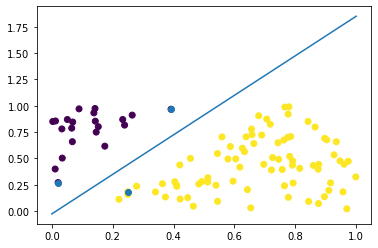

In [467]:
plt.scatter(lin_array[:,0], lin_array[:,1], c = lin_array[:,2])
plt.scatter(support_vectors[:,0], support_vectors[:,1])
x = np.linspace(0,1,10)
y = (-b-w[0]*x)/w[1]
plt.plot(x,y[0])
plt.show()

In [5]:
print()

In [17]:
print('nonlinear separable part')

nonlinear separable part


In [18]:
nl = SVM(nonlin_array, False)

     pcost       dcost       gap    pres   dres
 0: -4.0666e+01 -1.0206e+02  5e+02  2e+01  3e+00
 1: -1.5924e+02 -2.2789e+02  3e+02  1e+01  1e+00
 2: -2.9280e+02 -3.6244e+02  3e+02  1e+01  1e+00
 3: -5.7710e+02 -6.0303e+02  4e+02  9e+00  1e+00
 4: -1.2873e+03 -1.2409e+03  5e+02  9e+00  1e+00
 5: -1.2647e+03 -1.0924e+03  7e+02  8e+00  9e-01
 6: -6.9076e+02 -4.0802e+02  1e+03  5e+00  6e-01
 7: -1.8688e+02 -2.9779e+01  4e+02  1e+00  2e-01
 8: -3.4731e+00 -5.2038e-02  1e+01  3e-02  4e-03
 9: -3.5053e-02 -3.8447e-02  1e-01  3e-04  3e-05
10: -2.1413e-02 -2.7448e-02  6e-03  1e-17  2e-13
11: -2.6166e-02 -2.6328e-02  2e-04  1e-17  1e-13
12: -2.6293e-02 -2.6295e-02  2e-06  5e-18  2e-13
13: -2.6295e-02 -2.6295e-02  2e-08  5e-18  2e-13
Optimal solution found.


In [19]:
b_nl = nl.get_parameter()

In [20]:
print('b')
print(b_nl)

b
-16.66005056662167


In [21]:
support_vectors_nl = nl.get_support_vectors()

In [22]:
print('support_vectors:')
print(support_vectors_nl)

support_vectors:
[[ -8.47422847   5.15621613]
 [-10.260969     2.07391791]
 [  1.3393313  -10.29098822]
 [  9.67917724   4.3759541 ]
 [ -6.80002274  -7.02384335]
 [  9.90143538  -0.31483149]]


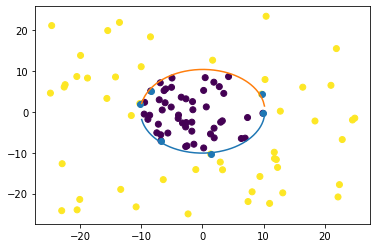

In [460]:
plt.scatter(nonlin_array[:,0], nonlin_array[:,1], c = nonlin_array[:,2])
plt.scatter(support_vectors_nl[:,0], support_vectors_nl[:,1])

x = np.linspace(-20,20,200)
y1 = []
y2 = []
for i in x:
    y = nl.curve_func(i)
    if len(y) == 0:
        y1.append(None)
        y2.append(None)
    elif len(y)<2 and len(y)>0:
        y1.append(y[0])
        y2.append(y[0])
    else:
        y1.append(y[0])
        y2.append(y[1])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()